# Project 2
### Mapping the Top 10 Market Value Fortune 500 Companies in the U.S.

Import Pandas. Use Plotly Express-powered backend for Pandas plotting. 

In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode+jupyterlab+notebook_connected"

Read the Fortune500.csv data. The source is https://www.kaggle.com/datasets/RM1000/fortune-500-companies. Prepare for the merge by changing the "name" column title to "company.".

In [4]:
Fortune500 = pd.read_csv("F500.csv", delimiter = ";")
Fortune500.rename(columns={"name": "company"}, inplace = True)
Fortune500.head()

,id,rank,company,employees,previousrank,revenues,revenuechange,profits,profitschange,assets,marketvalue
0,2,1,Walmart,"2,300,000",1.0,"$485,873",0.8%,"$13,643.0",-7.2%,"$198,825","$218,619"
1,3,2,Berkshire Hathaway,"367,700",4.0,"$223,604",6.1%,"$24,074.0",0.0%,"$620,854","$411,035"
2,4,3,Apple,"116,000",3.0,"$215,639",-7.7%,"$45,687.0",-14.4%,"$321,686","$753,718"
3,5,4,Exxon Mobil,"72,700",2.0,"$205,004",-16.7%,"$7,840.0",-51.5%,"$330,314","$340,056"
4,6,5,McKesson,"68,000",5.0,"$192,487",6.2%,"$2,258.0",53.0%,"$56,563","$31,439"


Read the TopCompanies.xlsx data. This data was provided in another DAQA course using Tableau. Now, I'd like to use Python to do the visualization.

In [7]:
TopComp_Geo = pd.read_excel('TopCompanies.xlsx')
TopComp_Geo.head()

,longitude,latitude,company,location,industry,state,city
0,-94.2088,36.3729,Walmart,"Bentonville, AR",General Merchandisers,AR,Bentonville
1,-96.9489,32.8140,Exxon Mobil,"Irving, TX",Petroleum Refining,TX,Irving
2,-121.9780,37.7799,Chevron,"San Ramon, CA",Petroleum Refining,CA,San Ramon
3,-95.9980,41.2524,Berkshire Hathaway,"Omaha, NE",Insurance: Property and Casualty (Stock),NE,Omaha
4,-122.0320,37.3230,Apple,"Cupertino, CA","Computers, Office Equipment",CA,Cupertino


Merge the two datasets on company using inner join.

In [10]:
df = pd.merge(Fortune500, TopComp_Geo, on = "company", how = "inner")
df

,id,rank,company,employees,previousrank,revenues,revenuechange,profits,profitschange,assets,marketvalue,longitude,latitude,location,industry,state,city
0,2,1,Walmart,"2,300,000",1.0,"$485,873",0.8%,"$13,643.0",-7.2%,"$198,825","$218,619",-94.2088,36.3729,"Bentonville, AR",General Merchandisers,AR,Bentonville
1,3,2,Berkshire Hathaway,"367,700",4.0,"$223,604",6.1%,"$24,074.0",0.0%,"$620,854","$411,035",-95.9980,41.2524,"Omaha, NE",Insurance: Property and Casualty (Stock),NE,Omaha
2,4,3,Apple,"116,000",3.0,"$215,639",-7.7%,"$45,687.0",-14.4%,"$321,686","$753,718",-122.0320,37.3230,"Cupertino, CA","Computers, Office Equipment",CA,Cupertino
3,5,4,Exxon Mobil,"72,700",2.0,"$205,004",-16.7%,"$7,840.0",-51.5%,"$330,314","$340,056",-96.9489,32.8140,"Irving, TX",Petroleum Refining,TX,Irving
4,6,5,McKesson,"68,000",5.0,"$192,487",6.2%,"$2,258.0",53.0%,"$56,563","$31,439",-122.4190,37.7749,"San Francisco, CA",Wholesalers: Health Care,CA,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,496,495,Big Lots,"23,150",495.0,"$5,200",0.2%,$152.8,7.0%,"$1,608","$2,180",-82.9988,39.9612,"Columbus, OH",Specialty Retailers: Other,OH,Columbus
470,497,496,Michaels Cos.,"31,000",517.0,"$5,197",5.8%,$378.2,4.2%,"$2,148","$4,229",-96.9489,32.8140,"Irving, TX",Specialty Retailers: Other,TX,Irving
471,498,497,Toll Brothers,"4,200",576.0,"$5,170",23.9%,$382.1,5.2%,"$9,737","$5,872",-75.1285,40.1784,"Horsham, PA",Homebuilders,PA,Horsham
472,499,498,Yahoo,"8,500",513.0,"$5,169",4.0%,-$214.3,-,"$48,083","$44,391",-122.0360,37.3688,"Sunnyvale, CA",Internet Services and Retailing,CA,Sunnyvale


I want to filter the companies with the top 10 market values. Here’s the process:
1.	Clean the marketvalue column by removing irrelevant symbols, converting the data type to float, and replacing any NaN values with 0;
2.	Sort the data in descending order by market value and extract the top 10 entries;
3.	Retain only the columns that are relevant to my analysis.

In [13]:
df["marketvalue"] = df["marketvalue"].replace(r"[\$,]", "", regex = True).replace("-", None).astype(float)
df["marketvalue"] = df["marketvalue"].fillna(0)

df_top10_raw = df.sort_values(by = "marketvalue", ascending = False).head(10)
df_top10 = df_top10_raw[["id", "rank", "company", "marketvalue", "longitude", "latitude", "location", "industry"]]
df_top10

,id,rank,company,marketvalue,longitude,latitude,location,industry
2,4,3,Apple,753718.0,-122.0320,37.3230,"Cupertino, CA","Computers, Office Equipment"
25,28,27,Alphabet,579426.0,-122.0840,37.3861,"Mountain View, CA",Internet Services and Retailing
26,29,28,Microsoft,508935.0,-122.1220,47.6740,"Redmond, WA",Computer Software
11,13,12,Amazon.com,423031.0,-122.3320,47.6062,"Seattle, WA",Internet Services and Retailing
1,3,2,Berkshire Hathaway,411035.0,-95.9980,41.2524,"Omaha, NE",Insurance: Property and Casualty (Stock)
93,99,98,Facebook,410522.0,-122.1820,37.4530,"Menlo Park, CA",Internet Services and Retailing
3,5,4,Exxon Mobil,340056.0,-96.9489,32.8140,"Irving, TX",Petroleum Refining
33,36,35,Johnson & Johnson,337642.0,-74.4518,40.4862,"New Brunswick, NJ",Pharmaceuticals
19,22,21,J.P. Morgan Chase,313761.0,-74.0059,40.7128,"New York, NY",Commercial Banks
23,26,25,Wells Fargo,278516.0,-122.4190,37.7749,"San Francisco, CA",Commercial Banks


Create a geographic scatter plot of the table above. Map each company’s location using latitude and longitude, with dot size and color representing the market value. Additional hover data includes company name, market value, location, and industry is displayed.

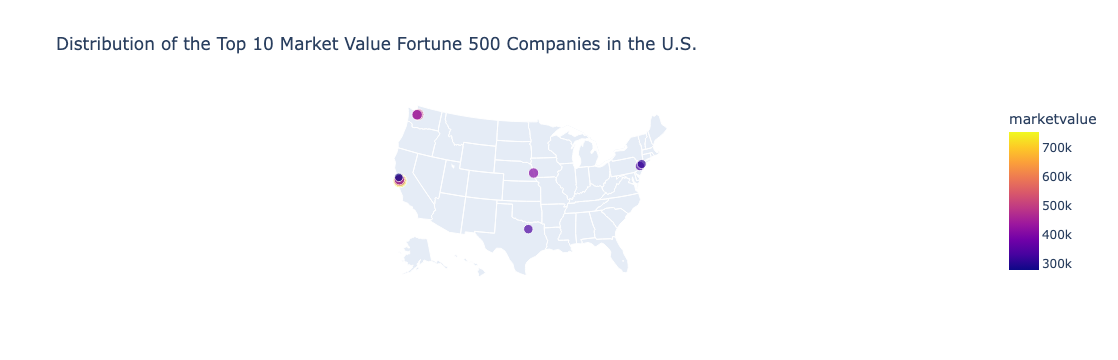

In [16]:
fig = px.scatter_geo(
    df_top10,
    lat = "latitude",
    lon = "longitude",
    size = "marketvalue",
    color = "marketvalue",
    hover_name = "company",
    hover_data = {"latitude": False, "longitude": False, "marketvalue": True, "location": True, "industry": True},
    title = "Distribution of the Top 10 Market Value Fortune 500 Companies in the U.S.",
    scope = "usa",
    template = "plotly",
    size_max = 10
)

fig.update_traces(marker = dict(opacity = 0.7), text = None)
fig.show()

### Takeaways
1. The Top 10 market value Fortune 500 companies in the U.S. are concentrated in five major states: California (4 companies), New York (2 companies), Washington (2 companies), Nebraska (1 company), and Texas (1 company). However, since these companies are geographically clustered, this visualization may not be the most effective way to display the data. Users need to carefully hover over California, New York, and Washington to view each company.
2. Geographically, 80% of the Top 10 market share Fortune 500 companies are located along the coasts, with only two companies situated inland.
3. Industry-wise, the majority of these companies on the West Coast are concentrated in the technology sector. In contrast, inland companies are predominantly in heavy industry and financial services, while East Coast companies focus on financial services and pharmaceuticals.